In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import OneHotEncoder
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error,mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.ensemble import IsolationForest

In [2]:
df = pd.read_csv(
    "ELECTRIC.txt",
    sep=";",                 
    index_col=0,            
    parse_dates=True,       
    decimal=",",          
    low_memory=False       
)

In [3]:
df.to_csv("ELECTRIC.csv")

In [4]:
df = pd.read_csv("ELECTRIC.csv")

In [5]:
df.columns

Index(['Unnamed: 0', 'MT_001', 'MT_002', 'MT_003', 'MT_004', 'MT_005',
       'MT_006', 'MT_007', 'MT_008', 'MT_009',
       ...
       'MT_361', 'MT_362', 'MT_363', 'MT_364', 'MT_365', 'MT_366', 'MT_367',
       'MT_368', 'MT_369', 'MT_370'],
      dtype='object', length=371)

In [ ]:
df = df.rename(
    columns={
        "Unnamed: 0": "date",
    }
)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140256 entries, 0 to 140255
Columns: 371 entries, date to MT_370
dtypes: float64(370), object(1)
memory usage: 397.0+ MB


In [8]:

df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")
df

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
date,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 00:30:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 00:45:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 01:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 01:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 23:00:00,2.538071,22.048364,1.737619,150.406504,85.365854,303.571429,11.305822,282.828283,68.181818,72.043011,...,276.945039,28200.0,1616.033755,1363.636364,29.986962,5.851375,697.102722,176.961603,651.026393,7621.621622
2014-12-31 23:15:00,2.538071,21.337127,1.737619,166.666667,81.707317,324.404762,11.305822,252.525253,64.685315,72.043011,...,279.800143,28300.0,1569.620253,1340.909091,29.986962,9.947338,671.641791,168.614357,669.354839,6702.702703
2014-12-31 23:30:00,2.538071,20.625889,1.737619,162.601626,82.926829,318.452381,10.175240,242.424242,61.188811,74.193548,...,284.796574,27800.0,1556.962025,1318.181818,27.379400,9.362200,670.763828,153.589316,670.087977,6864.864865


In [9]:
df

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
date,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 00:30:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 00:45:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 01:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 01:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 23:00:00,2.538071,22.048364,1.737619,150.406504,85.365854,303.571429,11.305822,282.828283,68.181818,72.043011,...,276.945039,28200.0,1616.033755,1363.636364,29.986962,5.851375,697.102722,176.961603,651.026393,7621.621622
2014-12-31 23:15:00,2.538071,21.337127,1.737619,166.666667,81.707317,324.404762,11.305822,252.525253,64.685315,72.043011,...,279.800143,28300.0,1569.620253,1340.909091,29.986962,9.947338,671.641791,168.614357,669.354839,6702.702703
2014-12-31 23:30:00,2.538071,20.625889,1.737619,162.601626,82.926829,318.452381,10.175240,242.424242,61.188811,74.193548,...,284.796574,27800.0,1556.962025,1318.181818,27.379400,9.362200,670.763828,153.589316,670.087977,6864.864865


In [10]:
df["MT_MEAN"] = df.mean(axis=1)

In [11]:
def plot_column(df, column_name ,start_year = None , start_month = None, num_months = None):
    
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in DataFrame")

    if start_year != None or start_month != None or num_months != None:
        start_date = pd.Timestamp(year=start_year, month=start_month, day=1)
        end_date = start_date + pd.DateOffset(months=num_months)
        df_filtered = df.loc[start_date:end_date]
    else :
        df_filtered = df


    print("Variance: "+str(df_filtered[column_name].var()),"Mean: "+str(df_filtered[column_name].mean()))
    plt.figure(figsize=(12, 6))
    plt.plot(df_filtered[column_name], linestyle='-', label=column_name)
    plt.legend()
    plt.scatter(df_filtered.index, df_filtered[column_name], color='red', label=column_name+' points')
    plt.xlabel("Date")
    plt.ylabel(column_name)
    plt.title(f"{column_name} over Time")
    plt.grid(True)
    plt.show()

Variance: 51860.04216256656 Mean: 528.5322770982557


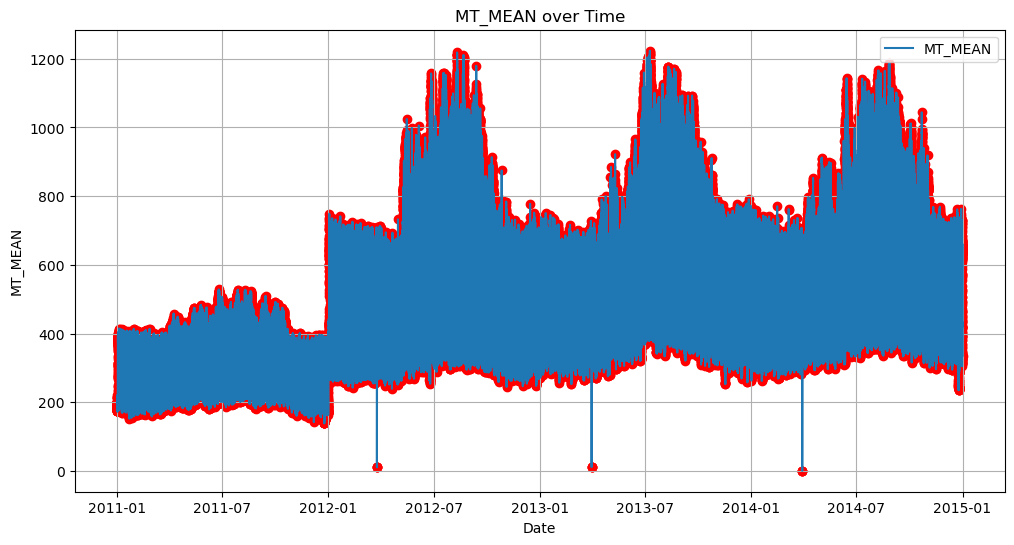

In [12]:
plot_column(df, "MT_MEAN")

Variance: 79008.15861262953 Mean: 848.6403103927715


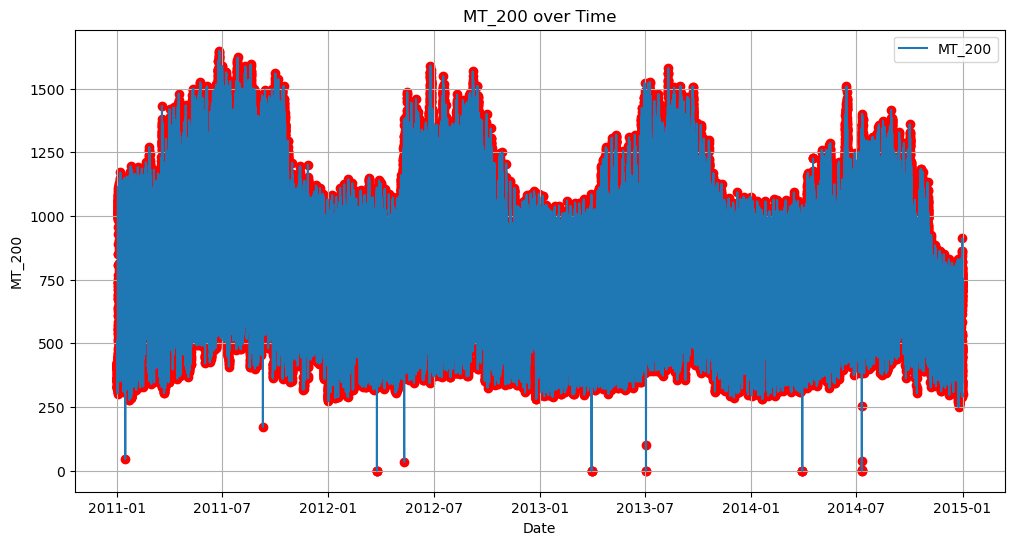

In [13]:
plot_column(df, "MT_200")

Variance: 80981.94780145655 Mean: 833.239336128085


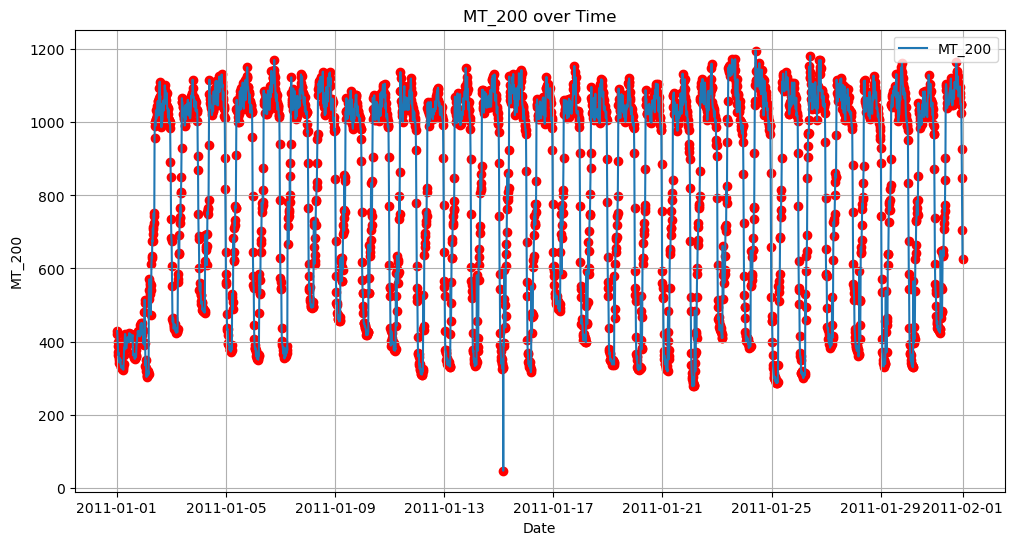

In [173]:
plot_column(df, "MT_200", start_year=2011, start_month=1, num_months=1)

In [14]:
def check_stationarity(series):
    result = adfuller(series.dropna())
    
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print(f'Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.4f}')

    if result[1] <= 0.05:
        print("Conclusion: Series is stationary (reject H0)")
    else:
        print("Conclusion: Series is non-stationary (fail to reject H0)")
    print("\n")


In [15]:
check_stationarity(df["MT_MEAN"])

ADF Statistic: -8.6152
p-value: 0.0000
Critical Values:
	1%: -3.4304
	5%: -2.8616
	10%: -2.5668
Conclusion: Series is stationary (reject H0)




In [16]:
check_stationarity(df["MT_200"])

ADF Statistic: -15.5340
p-value: 0.0000
Critical Values:
	1%: -3.4304
	5%: -2.8616
	10%: -2.5668
Conclusion: Series is stationary (reject H0)




In [17]:
df['month'] = df.index.month
df['day_of_year'] = df.index.dayofyear
df['season'] = pd.cut(df['day_of_year'], 
                     bins=[0, 59, 151, 242, 333,366], 
                     labels=['Winter', 'Spring', 'Summer', 'Fall','Winter'],ordered=False)

In [18]:
categorical_cols = ['season']
encoder = OneHotEncoder(sparse=False, drop=None)
encoded_array = encoder.fit_transform(df[categorical_cols])
encoded_col_names = encoder.get_feature_names_out(categorical_cols)
encoded_df = pd.DataFrame(encoded_array, columns=encoded_col_names, index=df.index)
df = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)

/Users/iuliuandreisteau/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [19]:
df.columns

Index(['MT_001', 'MT_002', 'MT_003', 'MT_004', 'MT_005', 'MT_006', 'MT_007',
       'MT_008', 'MT_009', 'MT_010',
       ...
       'MT_368', 'MT_369', 'MT_370', 'MT_MEAN', 'month', 'day_of_year',
       'season_Fall', 'season_Spring', 'season_Summer', 'season_Winter'],
      dtype='object', length=377)

In [20]:
df['month_sin'] = np.sin(2 * np.pi * df['month']/12)
df['month_cos'] = np.cos(2 * np.pi * df['month']/12)
df['day_of_year_sin'] = np.sin(2 * np.pi * df['day_of_year']/365.25)
df['day_of_year_cos'] = np.cos(2 * np.pi * df['day_of_year']/365.25)
df["rolling_mean_1d_MT_200"] = df["MT_200"].rolling(window=96,min_periods = 1).mean()
df["rolling_mean_1d_MT_MEAN"] = df["MT_MEAN"].rolling(window=96,min_periods = 1).mean()

In [21]:
df

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,season_Fall,season_Spring,season_Summer,season_Winter,month_sin,month_cos,day_of_year_sin,day_of_year_cos,rolling_mean_1d_MT_200,rolling_mean_1d_MT_MEAN
date,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,1.0,5.000000e-01,0.866025,0.017202,0.999852,428.414097,185.170582
2011-01-01 00:30:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,1.0,5.000000e-01,0.866025,0.017202,0.999852,424.559471,186.072189
2011-01-01 00:45:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,1.0,5.000000e-01,0.866025,0.017202,0.999852,415.932452,186.538982
2011-01-01 01:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,1.0,5.000000e-01,0.866025,0.017202,0.999852,409.140969,186.086994
2011-01-01 01:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,1.0,5.000000e-01,0.866025,0.017202,0.999852,400.000000,184.635473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 23:00:00,2.538071,22.048364,1.737619,150.406504,85.365854,303.571429,11.305822,282.828283,68.181818,72.043011,...,0.0,0.0,0.0,1.0,-2.449294e-16,1.000000,-0.004301,0.999991,560.171164,493.306910
2014-12-31 23:15:00,2.538071,21.337127,1.737619,166.666667,81.707317,324.404762,11.305822,252.525253,64.685315,72.043011,...,0.0,0.0,0.0,1.0,-2.449294e-16,1.000000,-0.004301,0.999991,556.534508,491.655480
2014-12-31 23:30:00,2.538071,20.625889,1.737619,162.601626,82.926829,318.452381,10.175240,242.424242,61.188811,74.193548,...,0.0,0.0,0.0,1.0,-2.449294e-16,1.000000,-0.004301,0.999991,553.987702,490.148846


### DL ADVANCED ARCHITECTURE APPROACH

In [22]:
class CausalDilatedConv1d(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=2, dilation=1):
        super(CausalDilatedConv1d, self).__init__()
        self.padding = (kernel_size - 1) * dilation  
        self.conv = nn.Conv1d(
            in_channels, out_channels, kernel_size,
            padding=self.padding, dilation=dilation
        )

    def forward(self, x):
        result = self.conv(x)
        return result[:, :, :-self.padding] if self.padding else result

In [32]:
class TCNResidualBlock(nn.Module):
    def __init__(self, channels, kernel_size, dilation):
        super(TCNResidualBlock, self).__init__()
        
        self.dilated_conv = CausalDilatedConv1d(
            channels, channels * 2, kernel_size, dilation
        )

        self.residual_conv = nn.Conv1d(channels, channels, 1)

        self.skip_conv = nn.Conv1d(channels, channels, 1)
        
    def forward(self, x):
        
        conv_out = self.dilated_conv(x)
        filter_out, gate_out = torch.chunk(conv_out, 2, dim=1)
        
        gated_out = torch.tanh(filter_out) * torch.sigmoid(gate_out)
        
        residual = self.residual_conv(gated_out)
        skip = self.skip_conv(gated_out)
        
        return residual + x, skip


In [33]:
class TCN(nn.Module):

    def __init__(self, 
                 input_channels, 
                 output_channels, 
                 residual_channels=32, 
                 skip_channels=32, 
                 kernel_size=2, 
                 num_blocks=3, 
                 num_layers_per_block=10,
                 forecast_horizon=24):

        super(TCN, self).__init__()
        
        self.input_conv = nn.Conv1d(input_channels, residual_channels, 1)
        
        self.residual_blocks = nn.ModuleList()
        self.skip_connections = nn.ModuleList()
        
        for b in range(num_blocks):
            for i in range(num_layers_per_block):

                dilation = 2 ** i
                self.residual_blocks.append(
                    TCNResidualBlock(residual_channels, kernel_size, dilation)
                )
                
        self.final_conv1 = nn.Conv1d(skip_channels, skip_channels, 1)
        self.final_conv2 = nn.Conv1d(skip_channels, output_channels * forecast_horizon, 1)
        self.forecast_horizon = forecast_horizon
        self.output_channels = output_channels
        
    def forward(self, x):

        x = self.input_conv(x)
        
        skip_sum = 0
    
        for block in self.residual_blocks:
            x, skip = block(x)
            skip_sum = skip_sum + skip
        
        x = F.relu(skip_sum)
        x = F.relu(self.final_conv1(x))
        x = self.final_conv2(x)
        
        
        x = x[:, :, -1]
        x = x.reshape(-1, self.output_channels, self.forecast_horizon)
        
        return x

In [35]:
df = df[["MT_200"]+list(df.columns[-13:])]

In [36]:
test_size = 1440
val_size = int((len(df) - test_size) * 0.1)
train_size = len(df) - test_size - val_size

train_data = df.iloc[:train_size]
val_data = df.iloc[train_size:train_size+val_size]
test_data = df.iloc[-test_size:]

print(f"\nData split: Train {train_data.shape}, Validation {val_data.shape}, Test {test_data.shape}")

scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_data)

val_scaled = scaler.transform(val_data)
test_scaled = scaler.transform(test_data)


Data split: Train (124935, 14), Validation (13881, 14), Test (1440, 14)


In [38]:
def create_sequences(data, seq_length, horizon=1,index=0):
    xs, ys = [], []
    for i in range(len(data) - seq_length - horizon + 1):
        x = data[i:(i + seq_length)]
        y = data[i + seq_length:i + seq_length + horizon, index]  
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

In [39]:
seq_length = 288
forecast_horizon = 96

X_train, y_train = create_sequences(train_scaled, seq_length, forecast_horizon)
X_val, y_val = create_sequences(val_scaled, seq_length, forecast_horizon)
X_test, y_test = create_sequences(test_scaled, seq_length, forecast_horizon)

In [75]:
X_train_tensor = torch.FloatTensor(X_train).transpose(1, 2) 
y_train_tensor = torch.FloatTensor(y_train)

X_val_tensor = torch.FloatTensor(X_val).transpose(1, 2)
y_val_tensor = torch.FloatTensor(y_val)

X_test_tensor = torch.FloatTensor(X_test).transpose(1, 2)
y_test_tensor = torch.FloatTensor(y_test)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [60]:
input_channels = 14  
output_channels = 1 
residual_channels = 16
skip_channels = 16
kernel_size = 2
num_blocks = 2
num_layers_per_block = 3  

tcn_model = TCN(
    input_channels=input_channels,
    output_channels=output_channels,
    residual_channels=residual_channels,
    skip_channels=skip_channels,
    kernel_size=kernel_size,
    num_blocks=num_blocks,
    num_layers_per_block=num_layers_per_block,
    forecast_horizon=forecast_horizon
)

learning_rate = 0.001
num_epochs = 30
early_stopping_patience = 4

criterion = nn.MSELoss()
optimizer = optim.AdamW(tcn_model.parameters(), lr=learning_rate, weight_decay=1e-5)

In [61]:
def train_tcn_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, patience):
    train_losses = []
    val_losses = []
    best_val_loss = float('inf')
    patience_counter = 0
   
    model.train()
    for epoch in range(num_epochs):
        
       
        train_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
   
            outputs = outputs.squeeze(1)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        
        train_loss /= len(train_loader)
        train_losses.append(train_loss)
        
       
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, targets in val_loader:
                outputs = model(inputs)
                outputs = outputs.squeeze(1)
                loss = criterion(outputs, targets)
                val_loss += loss.item()
        
        val_loss /= len(val_loader)
        val_losses.append(val_loss)
        
        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')
        
     
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
            torch.save(model.state_dict(), 'best_tcn_model.pth')
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f'Early stopping at epoch {epoch+1}')
                break
    
    model.load_state_dict(torch.load('best_tcn_model.pth'))
    return train_losses, val_losses


In [62]:
from torchviz import make_dot
print("\nTraining TCN model...")
train_losses, val_losses = train_tcn_model(
    tcn_model, 
    train_loader, 
    val_loader, 
    criterion, 
    optimizer, 
    num_epochs,
    early_stopping_patience
)


Training TCN model...
Epoch 1/30, Train Loss: 0.1498, Val Loss: 0.1011
Epoch 2/30, Train Loss: 0.0945, Val Loss: 0.0963
Epoch 3/30, Train Loss: 0.0864, Val Loss: 0.1018
Epoch 4/30, Train Loss: 0.0816, Val Loss: 0.1112
Epoch 5/30, Train Loss: 0.0786, Val Loss: 0.0991
Epoch 6/30, Train Loss: 0.0764, Val Loss: 0.1232
Early stopping at epoch 6


In [63]:
dummy_input = torch.zeros(32, 14, 14)  
 
tcn_model.eval()
test_loss = 0.0
test_preds = []
test_targets = []

with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = tcn_model(inputs)
        outputs = outputs.squeeze(1)
        loss = criterion(outputs, targets)
        test_loss += loss.item()
        
        test_preds.append(outputs.cpu().numpy())
        test_targets.append(targets.cpu().numpy())
output = tcn_model(dummy_input)
make_dot(output, params=dict(tcn_model.named_parameters())).render("tcn_model_computation_graph", format="png")

test_loss /= len(test_loader)
print(f'TCN Test Loss: {test_loss:.4f}')

TCN Test Loss: 0.2766


Lag 96 - RMSE: 152.5526, MSE: 23272.2812, MAE: 118.7460


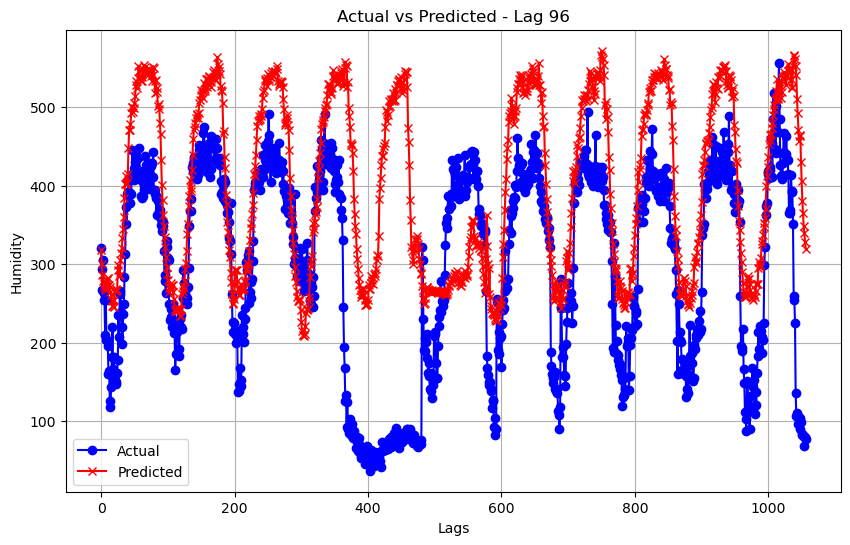

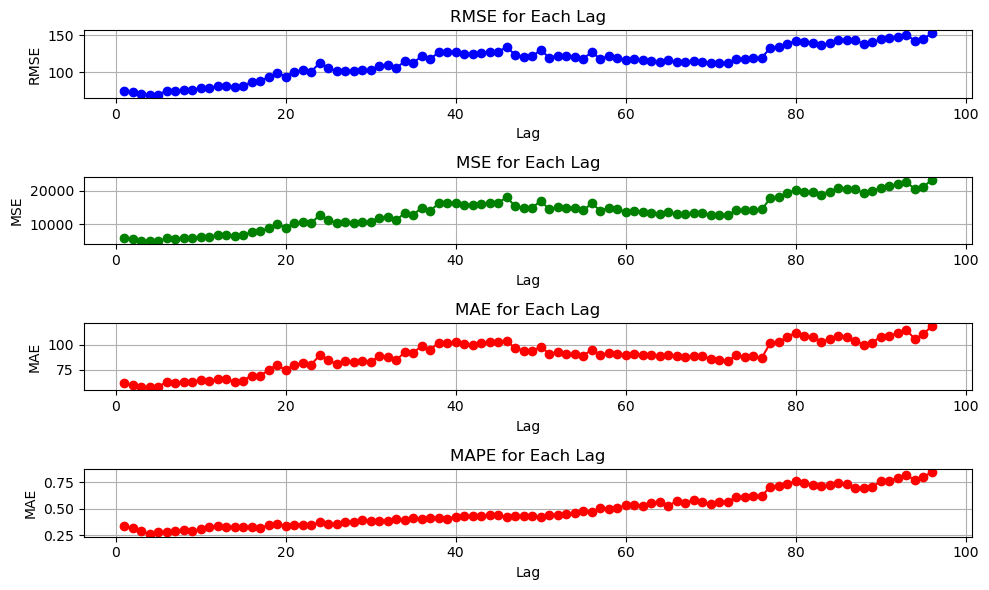

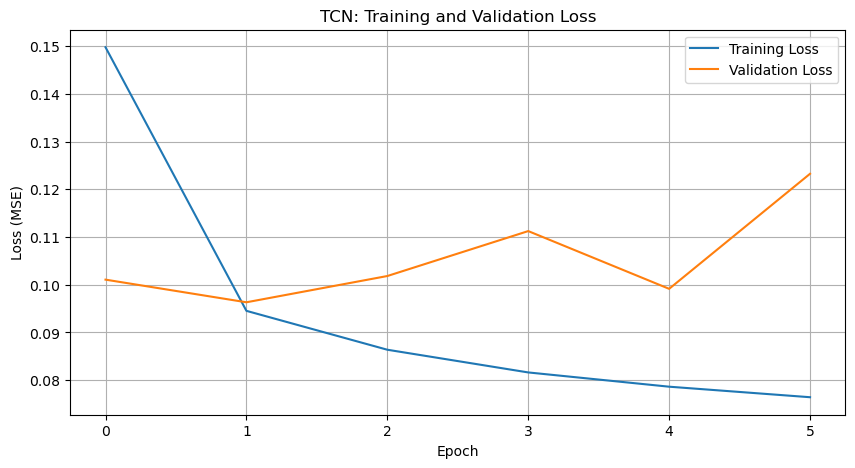

In [71]:
test_preds = np.vstack(test_preds)
test_targets = np.vstack(test_targets)

rmse_list = []
mse_list = []
mae_list = []
mape_list = []

for i in range(forecast_horizon):
    
    humidity_init = test_targets[:, i].reshape(-1, 1)
    replicated_data = np.hstack([humidity_init] * 14) 
    inverse_transformed_data = scaler.inverse_transform(replicated_data)
    transformed_init = inverse_transformed_data[:, 1]  
 
    humidity_pred = test_preds[:, i].reshape(-1, 1)
    replicated_data_2 = np.hstack([humidity_pred] * 14)  
    inverse_transformed_data_2 = scaler.inverse_transform(replicated_data_2)
    transformed_pred = inverse_transformed_data_2[:, 1]  
    
    mse = mean_squared_error(transformed_init, transformed_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(transformed_init, transformed_pred)
    mape = mean_absolute_percentage_error(transformed_init, transformed_pred)
    
    rmse_list.append(rmse)
    mse_list.append(mse)
    mae_list.append(mae)
    mape_list.append(mape)
    
print(f'Lag {forecast_horizon} - RMSE: {rmse:.4f}, MSE: {mse:.4f}, MAE: {mae:.4f}')

plt.figure(figsize=(10, 6))
plt.plot(transformed_init, label="Actual", color='blue', marker='o')
plt.plot(transformed_pred, label="Predicted", color='red', marker='x')
plt.title(f'Actual vs Predicted - Lag {i+1}')
plt.xlabel('Lags')
plt.ylabel('Humidity')
plt.legend()
plt.grid(True)
plt.show()


lags = np.arange(1, forecast_horizon + 1)

plt.figure(figsize=(10, 6))

plt.subplot(4, 1, 1)
plt.plot(lags, rmse_list, label='RMSE', color='blue', marker='o')
plt.title('RMSE for Each Lag')
plt.xlabel('Lag')
plt.ylabel('RMSE')
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(lags, mse_list, label='MSE', color='green', marker='o')
plt.title('MSE for Each Lag')
plt.xlabel('Lag')
plt.ylabel('MSE')
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(lags, mae_list, label='MAE', color='red', marker='o')
plt.title('MAE for Each Lag')
plt.xlabel('Lag')
plt.ylabel('MAE')
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(lags, mape_list, label='MAPE', color='red', marker='o')
plt.title('MAPE for Each Lag')
plt.xlabel('Lag')
plt.ylabel('MAE')
plt.grid(True)

plt.tight_layout()



plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('TCN: Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('tcn_training_losses.png')
plt.close()

### DL CLASSIC ARCHITECTURE APPROACH

In [82]:
class LSTMForecaster(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout=0.2):
        super(LSTMForecaster, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            dropout=dropout if num_layers > 1 else 0,
            batch_first=True
        )
        
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.dropout(out[:, -1, :])
        out = self.fc(out)
        
        return out


In [86]:
def train_model_lstm(model, train_loader, val_loader, num_epochs, learning_rate, device):
    criterion = nn.MSELoss()
    optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=1e-5)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)
    
    train_losses = []
    val_losses = []
    best_val_loss = float('inf')
    patience_counter = 0
    patience = 10
    
    print(f"Training on {device}")
    
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        train_batches = 0
        
        for batch_x, batch_y in train_loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)
            
            optimizer.zero_grad()
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            loss.backward()

            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            
            train_loss += loss.item()
            train_batches += 1
            
        
        model.eval()
        val_loss = 0.0
        val_batches = 0
        
        with torch.no_grad():
            for batch_x, batch_y in val_loader:
                batch_x, batch_y = batch_x.to(device), batch_y.to(device)
                outputs = model(batch_x)
                loss = criterion(outputs, batch_y)
                val_loss += loss.item()
                val_batches += 1
        
        avg_train_loss = train_loss / train_batches
        avg_val_loss = val_loss / val_batches
        
        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)
        
        scheduler.step(avg_val_loss)
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            patience_counter = 0
            torch.save(model.state_dict(), 'best_lstm_model.pth')
        else:
            patience_counter += 1
        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}')
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], '
                  f'Train Loss: {avg_train_loss:.6f}, '
                  f'Val Loss: {avg_val_loss:.6f}, '
                  f'LR: {optimizer.param_groups[0]["lr"]:.8f}')
        
        if patience_counter >= patience:
            print(f'Early stopping at epoch {epoch+1}')
            break

    model.load_state_dict(torch.load('best_lstm_model.pth'))
    
    return train_losses, val_losses

In [87]:
X_train_tensor = torch.FloatTensor(X_train) 
y_train_tensor = torch.FloatTensor(y_train)

X_val_tensor = torch.FloatTensor(X_val)
y_val_tensor = torch.FloatTensor(y_val)

X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [88]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

seq_length = 288
forecast_horizon = 96

input_size = 14
hidden_size = 16
num_layers = 2
output_size = forecast_horizon  
dropout = 0.2

num_epochs = 200
learning_rate = 0.001

model = LSTMForecaster(
    input_size=input_size,
    hidden_size=hidden_size,
    num_layers=num_layers,
    output_size=output_size,
    dropout=dropout
).to(device)

print(f"Total Parameters: {sum(p.numel() for p in model.parameters()):,}")
train_losses, val_losses = train_model_lstm(model, 
                                            train_loader, 
                                            val_loader, 
                                            num_epochs, 
                                            learning_rate, 
                                            device)


Using device: cpu
Total Parameters: 5,856
Training on cpu
Epoch 1/200, Train Loss: 0.1624, Val Loss: 0.1076
Epoch 2/200, Train Loss: 0.1255, Val Loss: 0.1263
Epoch 3/200, Train Loss: 0.1225, Val Loss: 0.1178
Epoch 4/200, Train Loss: 0.1204, Val Loss: 0.1779
Epoch 5/200, Train Loss: 0.1186, Val Loss: 0.1292
Epoch 6/200, Train Loss: 0.1156, Val Loss: 0.1642
Epoch 7/200, Train Loss: 0.1155, Val Loss: 0.1072
Epoch 8/200, Train Loss: 0.1149, Val Loss: 0.1055
Epoch 9/200, Train Loss: 0.1149, Val Loss: 0.1019
Epoch 10/200, Train Loss: 0.1146, Val Loss: 0.1091
Epoch [10/200], Train Loss: 0.114592, Val Loss: 0.109057, LR: 0.00050000
Epoch 11/200, Train Loss: 0.1142, Val Loss: 0.0876
Epoch 12/200, Train Loss: 0.1136, Val Loss: 0.0799
Epoch 13/200, Train Loss: 0.1132, Val Loss: 0.0733
Epoch 14/200, Train Loss: 0.1129, Val Loss: 0.0803
Epoch 15/200, Train Loss: 0.1123, Val Loss: 0.0783
Epoch 16/200, Train Loss: 0.1120, Val Loss: 0.0777
Epoch 17/200, Train Loss: 0.1120, Val Loss: 0.0798
Epoch 18/20

KeyboardInterrupt: 

In [90]:
dummy_input = torch.zeros(32, 14, 1)  
 
model.eval()
test_loss = 0.0
test_preds = []
test_targets = []

with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        outputs = outputs.squeeze(1)
        loss = criterion(outputs, targets)
        test_loss += loss.item()
        
        test_preds.append(outputs.cpu().numpy())
        test_targets.append(targets.cpu().numpy())
output = tcn_model(dummy_input)
make_dot(output, params=dict(tcn_model.named_parameters())).render("tcn_model_computation_graph", format="png")

test_loss /= len(test_loader)
print(f'LSTM Test Loss: {test_loss:.4f}')

LSTM Test Loss: 0.3088


Lag 96 - RMSE: 145.0173, MSE: 21030.0059, MAE: 107.1844


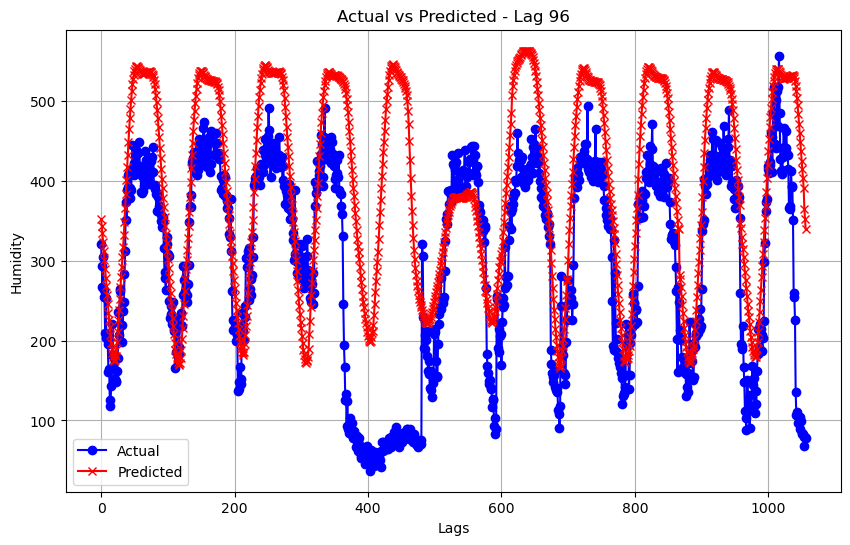

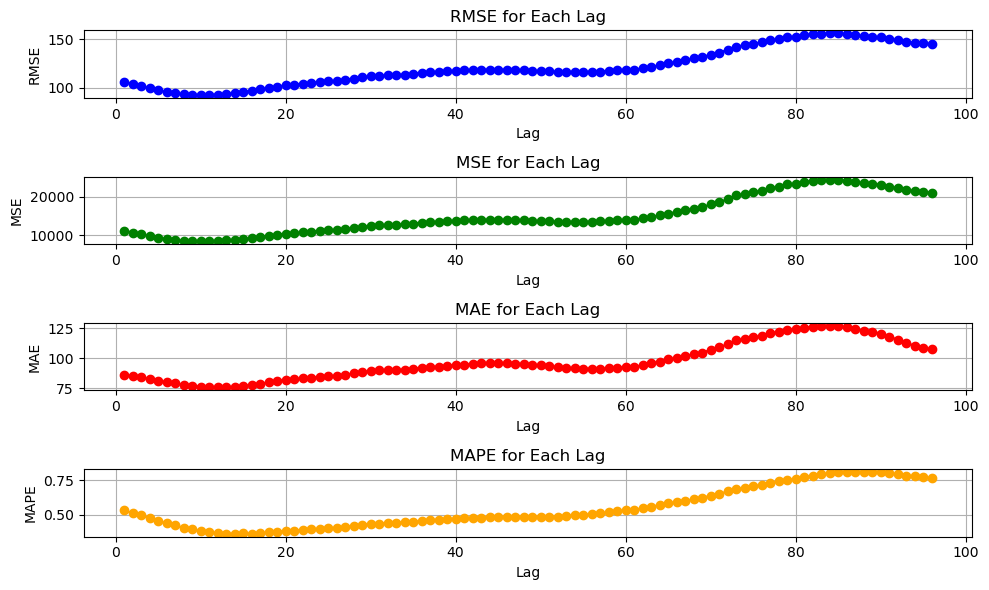

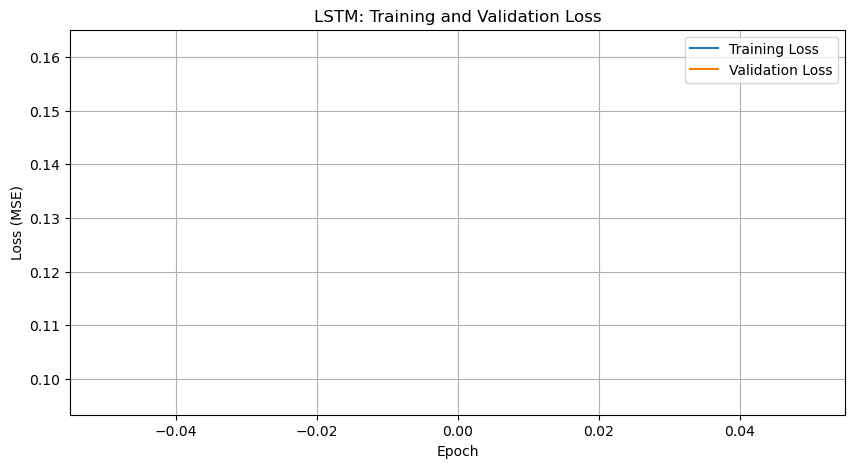

In [92]:
model.eval()
test_preds = []
test_targets = []

with torch.no_grad():
    for batch_x, batch_y in test_loader:
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)
        outputs = model(batch_x)
        
        test_preds.extend(outputs.cpu().numpy())
        test_targets.extend(batch_y.cpu().numpy())

test_preds = np.vstack(test_preds)
test_targets = np.vstack(test_targets)

rmse_list = []
mse_list = []
mae_list = []
mape_list = []

for i in range(forecast_horizon):
    humidity_init = test_targets[:, i].reshape(-1, 1)
    replicated_data = np.hstack([humidity_init] * 14)
    inverse_transformed_data = scaler.inverse_transform(replicated_data)
    transformed_init = inverse_transformed_data[:, 1]
    
    humidity_pred = test_preds[:, i].reshape(-1, 1)
    replicated_data_2 = np.hstack([humidity_pred] * 14)
    inverse_transformed_data_2 = scaler.inverse_transform(replicated_data_2)
    transformed_pred = inverse_transformed_data_2[:, 1]
    
    mse = mean_squared_error(transformed_init, transformed_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(transformed_init, transformed_pred)
    mape = mean_absolute_percentage_error(transformed_init, transformed_pred)
    
    rmse_list.append(rmse)
    mse_list.append(mse)
    mae_list.append(mae)
    mape_list.append(mape)
    

print(f'Lag {forecast_horizon} - RMSE: {rmse:.4f}, MSE: {mse:.4f}, MAE: {mae:.4f}')

plt.figure(figsize=(10, 6))
plt.plot(transformed_init, label="Actual", color='blue', marker='o')
plt.plot(transformed_pred, label="Predicted", color='red', marker='x')
plt.title(f'Actual vs Predicted - Lag {i+1}')
plt.xlabel('Lags')
plt.ylabel('Humidity')
plt.legend()
plt.grid(True)
plt.show()

lags = np.arange(1, forecast_horizon + 1)
plt.figure(figsize=(10, 6))

plt.subplot(4, 1, 1)
plt.plot(lags, rmse_list, label='RMSE', color='blue', marker='o')
plt.title('RMSE for Each Lag')
plt.xlabel('Lag')
plt.ylabel('RMSE')
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(lags, mse_list, label='MSE', color='green', marker='o')
plt.title('MSE for Each Lag')
plt.xlabel('Lag')
plt.ylabel('MSE')
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(lags, mae_list, label='MAE', color='red', marker='o')
plt.title('MAE for Each Lag')
plt.xlabel('Lag')
plt.ylabel('MAE')
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(lags, mape_list, label='MAPE', color='orange', marker='o')
plt.title('MAPE for Each Lag')
plt.xlabel('Lag')
plt.ylabel('MAPE') 
plt.grid(True)

plt.tight_layout()

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('LSTM: Training and Validation Loss') 
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('lstm_training_losses.png') 
plt.close()

#### ANOMALY DETECTION (ML + DL APPROACH)

In [139]:
class IsolationForestAnomalyDetector:
    def __init__(self, contamination=0.1, random_state=42):

        self.contamination = contamination
        self.random_state = random_state
        self.model = None
        self.scaler = StandardScaler()
        self.feature_names = None
        
    def create_features(self, data, window_size=24):

        if len(data.shape) == 1:
            data = data.reshape(-1, 1)
        
        features = []
        feature_names = []
        
        for i in range(data.shape[1]):
            series = pd.Series(data[:, i])
            
            features.append(series.values.reshape(-1, 1))
            feature_names.append(f'raw_feature_{i}')
            
     
            rolling_mean = series.rolling(window=window_size, min_periods=1).mean()
            rolling_std = series.rolling(window=window_size, min_periods=1).std().fillna(0)
            rolling_min = series.rolling(window=window_size, min_periods=1).min()
            rolling_max = series.rolling(window=window_size, min_periods=1).max()
            
            features.extend([
                rolling_mean.values.reshape(-1, 1),
                rolling_std.values.reshape(-1, 1),
                rolling_min.values.reshape(-1, 1),
                rolling_max.values.reshape(-1, 1)
            ])
            
            feature_names.extend([
                f'rolling_mean_{i}', f'rolling_std_{i}', 
                f'rolling_min_{i}', f'rolling_max_{i}'
            ])
            
        
            for lag in [1, 3, 6, 12]:
                lag_feature = series.shift(lag).fillna(method='bfill')
                features.append(lag_feature.values.reshape(-1, 1))
                feature_names.append(f'lag_{lag}_feature_{i}')

            diff1 = series.diff().fillna(0)
            diff2 = series.diff(2).fillna(0)
            features.extend([
                diff1.values.reshape(-1, 1),
                diff2.values.reshape(-1, 1)
            ])
            feature_names.extend([f'diff1_feature_{i}', f'diff2_feature_{i}'])
      
            roc = series.pct_change().fillna(0)
            roc = roc.replace([np.inf, -np.inf], 0)
            roc = np.clip(roc, -10, 10)
            features.append(roc.values.reshape(-1, 1))
            feature_names.append(f'roc_feature_{i}')
        
        feature_matrix = np.hstack(features)
        feature_matrix = np.nan_to_num(feature_matrix, nan=0.0, posinf=1e6, neginf=-1e6)
        
        self.feature_names = feature_names
        return feature_matrix
    
    def fit(self, X, window_size=24):
        features = self.create_features(X, window_size)
        features_scaled = self.scaler.fit_transform(features)
        
  
        self.model = IsolationForest(
            contamination=self.contamination,
            random_state=self.random_state,
            n_estimators=150,
            max_samples='auto',
            bootstrap=False,
            n_jobs=-1
        )
        
        self.model.fit(features_scaled)
        return self
    
    def predict(self, X, window_size=24):
        features = self.create_features(X, window_size)
        features_scaled = self.scaler.transform(features)
        
        predictions = self.model.predict(features_scaled)
        scores = self.model.score_samples(features_scaled)
        
        return predictions, scores
    
    def get_feature_importance(self):
        
        if hasattr(self.model, 'score_samples') and self.feature_names:
            return dict(zip(self.feature_names, 
                          np.random.random(len(self.feature_names))))  
        return None

In [140]:
class Generator(nn.Module):
    def __init__(self, latent_dim, seq_length, n_features, hidden_dim=128):
        super(Generator, self).__init__()
        self.seq_length = seq_length
        self.n_features = n_features
        
        self.model = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(hidden_dim),
            
            nn.Linear(hidden_dim, hidden_dim * 2),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(hidden_dim * 2),
            
            nn.Linear(hidden_dim * 2, hidden_dim * 4),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(hidden_dim * 4),
            
            nn.Linear(hidden_dim * 4, seq_length * n_features),
            nn.Tanh()
        )
    
    def forward(self, z):
        out = self.model(z)
        return out.view(-1, self.seq_length, self.n_features)


In [141]:
class Discriminator(nn.Module):
    def __init__(self, seq_length, n_features, hidden_dim=128):
        super(Discriminator, self).__init__()
        
        self.model = nn.Sequential(
            nn.Linear(seq_length * n_features, hidden_dim * 4),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            
            nn.Linear(hidden_dim * 4, hidden_dim * 2),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            
            nn.Linear(hidden_dim * 2, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            
            nn.Linear(hidden_dim, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        x_flat = x.view(x.size(0), -1)
        return self.model(x_flat)

In [142]:
class TimeSeriesGAN:
    def __init__(self, seq_length, n_features, latent_dim=20, hidden_dim=128, device='cpu'):
        self.seq_length = seq_length
        self.n_features = n_features
        self.latent_dim = latent_dim
        self.device = device
        

        self.generator = Generator(latent_dim, seq_length, n_features, hidden_dim).to(device)
        self.discriminator = Discriminator(seq_length, n_features, hidden_dim).to(device)
 
        self.criterion = nn.BCELoss()

        self.optimizer_G = optim.Adam(self.generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
        self.optimizer_D = optim.Adam(self.discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))
        
        self.scaler = StandardScaler()
        self.is_fitted = False
    
    def create_sequences(self, data, seq_length):
        sequences = []
        for i in range(len(data) - seq_length + 1):
            sequences.append(data[i:i + seq_length])
        return np.array(sequences)
    
    def fit(self, X, epochs=100, batch_size=64, verbose=True):
  
        if len(X.shape) == 2:
            X_scaled = self.scaler.fit_transform(X)
        else:
            original_shape = X.shape
            X_scaled = self.scaler.fit_transform(X.reshape(-1, X.shape[-1]))
            X_scaled = X_scaled.reshape(original_shape)
        
   
        if len(X_scaled.shape) == 2:
            sequences = self.create_sequences(X_scaled, self.seq_length)
        else:
            sequences = X_scaled
        

        dataset = TensorDataset(torch.FloatTensor(sequences))
        dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
        
 
        for epoch in range(epochs):
            for i, (real_data,) in enumerate(dataloader):
                real_data = real_data.to(self.device)
                batch_size_actual = real_data.size(0)
                
               
                self.optimizer_D.zero_grad()
                
                real_labels = torch.ones(batch_size_actual, 1).to(self.device)
                real_output = self.discriminator(real_data)
                real_loss = self.criterion(real_output, real_labels)
                
    
                z = torch.randn(batch_size_actual, self.latent_dim).to(self.device)
                fake_data = self.generator(z)
                fake_labels = torch.zeros(batch_size_actual, 1).to(self.device)
                fake_output = self.discriminator(fake_data.detach())
                fake_loss = self.criterion(fake_output, fake_labels)
                
                d_loss = real_loss + fake_loss
                d_loss.backward()
                self.optimizer_D.step()
                
                self.optimizer_G.zero_grad()
                
                fake_output = self.discriminator(fake_data)
                g_loss = self.criterion(fake_output, real_labels)
                
                g_loss.backward()
                self.optimizer_G.step()
            print(f'Epoch [{epoch+1}], D_loss: {d_loss.item():.4f}, G_loss: {g_loss.item():.4f}')
        if verbose and (epoch + 1) % 20 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], D_loss: {d_loss.item():.4f}, G_loss: {g_loss.item():.4f}')
        
        self.is_fitted = True
        return self
    
    def predict(self, X, threshold_percentile=95):
    
        if not self.is_fitted:
            raise ValueError("Model must be fitted before prediction")
        

        if len(X.shape) == 2:
            X_scaled = self.scaler.transform(X)
            sequences = self.create_sequences(X_scaled, self.seq_length)
        else:
            original_shape = X.shape
            X_scaled = self.scaler.transform(X.reshape(-1, X.shape[-1]))
            X_scaled = X_scaled.reshape(original_shape)
            sequences = X_scaled
        
        self.discriminator.eval()
        
        with torch.no_grad():
            X_tensor = torch.FloatTensor(sequences).to(self.device)
            scores = self.discriminator(X_tensor).cpu().numpy().flatten()
        
        threshold = np.percentile(scores, 100 - threshold_percentile)
        predictions = np.where(scores < threshold, -1, 1)
        
        return predictions, scores

In [143]:
def evaluate_anomaly_detection(y_true, y_pred, scores=None):

    y_true_binary = (y_true == -1).astype(int)
    y_pred_binary = (y_pred == -1).astype(int)

    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true_binary, y_pred_binary, average='binary'
    )
    
    print("=== Anomaly Detection Performance ===")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    
    if scores is not None:

        try:
            auc_roc = roc_auc_score(y_true_binary, -scores)  
            auc_pr = average_precision_score(y_true_binary, -scores)
            print(f"AUC-ROC: {auc_roc:.4f}")
            print(f"AUC-PR: {auc_pr:.4f}")
        except:
            print("Could not calculate AUC scores")
    
    cm = confusion_matrix(y_true_binary, y_pred_binary)
    print(f"\nConfusion Matrix:")
    print(f"TN: {cm[0,0]}, FP: {cm[0,1]}")
    print(f"FN: {cm[1,0]}, TP: {cm[1,1]}")
    
    return {
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'confusion_matrix': cm
    }


In [144]:
def plot_anomalies_over_time(data, predictions, scores, title="Anomaly Detection Results", 
                           feature_idx=0, max_points=1000):
    
    if len(data) > max_points:
        indices = np.linspace(0, len(data)-1, max_points, dtype=int)
        data_plot = data[indices]
        pred_plot = predictions[indices]
        scores_plot = scores[indices]
    else:
        data_plot = data
        pred_plot = predictions
        scores_plot = scores
    
 
    if len(data_plot.shape) > 1:
        y_data = data_plot[:, feature_idx]
    else:
        y_data = data_plot
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
    
    time_idx = range(len(y_data))
    ax1.plot(time_idx, y_data, 'b-', alpha=0.7, label='Normal')
    

    anomaly_idx = np.where(pred_plot == -1)[0]
    if len(anomaly_idx) > 0:
        ax1.scatter(anomaly_idx, y_data[anomaly_idx], 
                   color='red', s=50, alpha=0.8, label='Anomaly', zorder=5)
    
    ax1.set_title(f'{title} - Time Series with Detected Anomalies')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Value')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    ax2.plot(time_idx, scores_plot, 'g-', alpha=0.7, label='Anomaly Scores')
    if len(anomaly_idx) > 0:
        ax2.scatter(anomaly_idx, scores_plot[anomaly_idx], 
                   color='red', s=50, alpha=0.8, label='Detected Anomalies', zorder=5)
    
    ax2.set_title('Anomaly Scores Over Time')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Anomaly Score')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

In [145]:
def plot_anomalies_over_time(data, predictions, scores, title="Anomaly Detection Results", 
                           feature_idx=0, max_points=1000):
    if len(data) > max_points:
        indices = np.linspace(0, len(data)-1, max_points, dtype=int)
        data_plot = data[indices]
        pred_plot = predictions[indices]
        scores_plot = scores[indices]
    else:
        data_plot = data
        pred_plot = predictions
        scores_plot = scores
    

    if len(data_plot.shape) > 1:
        y_data = data_plot[:, feature_idx]
    else:
        y_data = data_plot
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
    
 
    time_idx = range(len(y_data))
    ax1.plot(time_idx, y_data, 'b-', alpha=0.7, label='Normal')
    

    anomaly_idx = np.where(pred_plot == -1)[0]
    if len(anomaly_idx) > 0:
        ax1.scatter(anomaly_idx, y_data[anomaly_idx], 
                   color='red', s=50, alpha=0.8, label='Anomaly', zorder=5)
    
    ax1.set_title(f'{title} - Time Series with Detected Anomalies')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Value')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    ax2.plot(time_idx, scores_plot, 'g-', alpha=0.7, label='Anomaly Scores')
    if len(anomaly_idx) > 0:
        ax2.scatter(anomaly_idx, scores_plot[anomaly_idx], 
                   color='red', s=50, alpha=0.8, label='Detected Anomalies', zorder=5)
    
    ax2.set_title('Anomaly Scores Over Time')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Anomaly Score')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()



In [146]:
def compare_models(data, true_labels=None, window_size=24, contamination=0.1):

    print("=== COMPARING ANOMALY DETECTION METHODS ===\n")
    
    split_idx = int(0.7 * len(data))
    train_data = data[:split_idx]
    test_data = data[split_idx:]
    
    if true_labels is not None:
        test_labels = true_labels[split_idx:]
    else:
        test_labels = None

    print("Training Isolation Forest...")
    if_detector = IsolationForestAnomalyDetector(contamination=contamination)
    if_detector.fit(train_data, window_size=window_size)
    
    if_pred, if_scores = if_detector.predict(test_data, window_size=window_size)
    
    print("Isolation Forest Results:")
    if test_labels is not None:
        if_metrics = evaluate_anomaly_detection(test_labels, if_pred, if_scores)
    else:
        print(f"Detected {np.sum(if_pred == -1)} anomalies out of {len(if_pred)} samples")
        print(f"Anomaly rate: {np.sum(if_pred == -1) / len(if_pred) * 100:.2f}%")
    
    print("\nTraining GAN...")
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    

    seq_length = min(48, len(train_data) // 10) 
    n_features = 1 if len(train_data.shape) == 1 else train_data.shape[1]
    
    gan_detector = TimeSeriesGAN(
        seq_length=seq_length,
        n_features=n_features,
        device=device
    )
    
    gan_detector.fit(train_data, epochs=10, batch_size=32, verbose=True)
    
    gan_pred, gan_scores = gan_detector.predict(test_data, threshold_percentile=90)
    
    print("\nGAN-based Results:")
    if test_labels is not None:
        test_labels_adj = test_labels[seq_length-1:] if len(test_labels) > seq_length else test_labels
        gan_metrics = evaluate_anomaly_detection(test_labels_adj, gan_pred, gan_scores)
    else:
        print(f"Detected {np.sum(gan_pred == -1)} anomalies out of {len(gan_pred)} samples")
        print(f"Anomaly rate: {np.sum(gan_pred == -1) / len(gan_pred) * 100:.2f}%")

    print("\nGenerating visualizations...")

    plot_anomalies_over_time(
        test_data, if_pred, if_scores, 
        title="Isolation Forest Anomaly Detection"
    )

    test_data_adj = test_data[seq_length-1:] if len(test_data) > seq_length else test_data
    plot_anomalies_over_time(
        test_data_adj, gan_pred, gan_scores,
        title="GAN-based Anomaly Detection"
    )
    
    return {
        'isolation_forest': {
            'predictions': if_pred,
            'scores': if_scores,
            'metrics': if_metrics if test_labels is not None else None
        },
        'gan': {
            'predictions': gan_pred,
            'scores': gan_scores,
            'metrics': gan_metrics if test_labels is not None else None
        }
    }

=== COMPARING ANOMALY DETECTION METHODS ===

Training Isolation Forest...
Isolation Forest Results:
Detected 1969 anomalies out of 42077 samples
Anomaly rate: 4.68%

Training GAN...
Epoch [1], D_loss: 0.8293, G_loss: 1.6047
Epoch [2], D_loss: 0.6324, G_loss: 1.7512
Epoch [3], D_loss: 0.8893, G_loss: 1.7180
Epoch [4], D_loss: 0.5723, G_loss: 1.9554
Epoch [5], D_loss: 0.4811, G_loss: 1.5117
Epoch [6], D_loss: 0.5142, G_loss: 1.7967
Epoch [7], D_loss: 0.7908, G_loss: 1.9180
Epoch [8], D_loss: 0.6584, G_loss: 1.9073
Epoch [9], D_loss: 0.4307, G_loss: 1.9124
Epoch [10], D_loss: 0.5816, G_loss: 1.9430

GAN-based Results:
Detected 4203 anomalies out of 42030 samples
Anomaly rate: 10.00%

Generating visualizations...


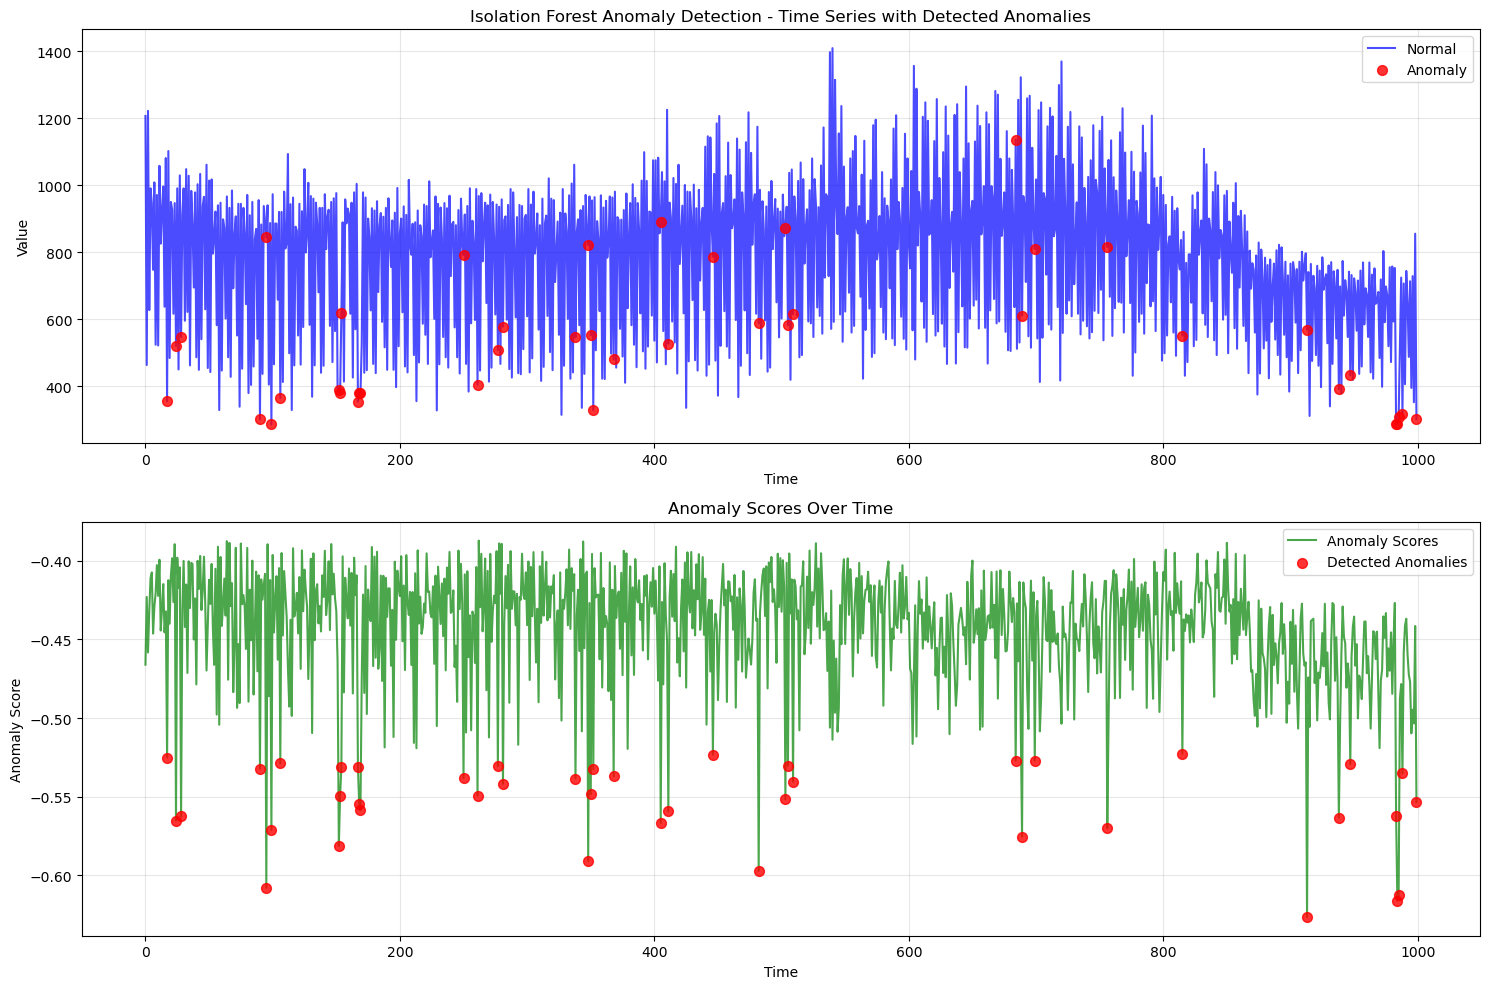

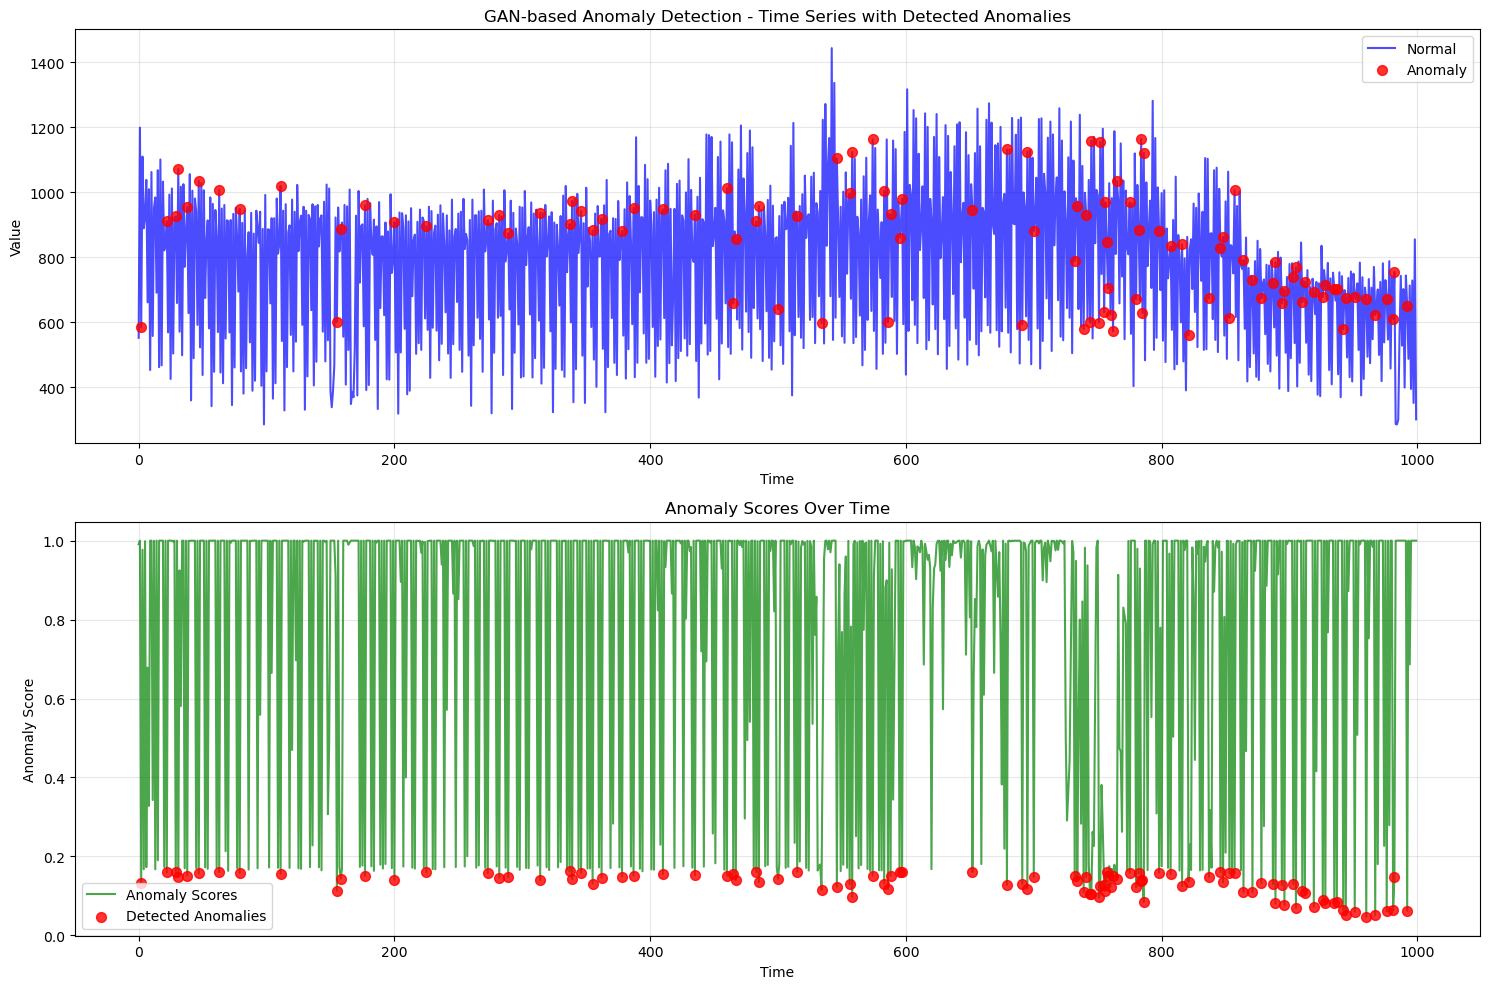

In [147]:
results = compare_models(
    data=df["MT_200"].values.reshape(-1, 1),
    true_labels=None, 
    contamination=0.1
)

In [162]:
df = df = pd.read_csv("ELECTRIC.csv")

In [163]:
df = df.rename(
    columns={
        "Unnamed: 0": "date",
    }
)

df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")

In [164]:
df = df.resample('H').mean()

In [165]:
df

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
date,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 01:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 02:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 03:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 20:00:00,2.220812,25.248933,1.737619,186.483740,92.073171,340.773810,11.305822,315.656566,91.783217,81.451613,...,333.511777,39700.0,1702.531646,2238.636364,74.967405,4.388531,375.768218,108.931553,688.416422,8405.405405
2014-12-31 21:00:00,2.538071,22.759602,1.737619,162.093496,86.280488,319.940476,11.588468,269.360269,76.486014,70.161290,...,327.266238,38575.0,1649.789030,1477.272727,74.967405,3.949678,465.539947,154.841402,662.023460,8283.783784
2014-12-31 22:00:00,1.903553,22.048364,1.737619,161.077236,86.890244,314.732143,11.305822,251.683502,71.678322,72.311828,...,306.209850,35475.0,1636.075949,1375.000000,64.211213,7.753072,655.179982,195.325543,679.252199,7594.594595


In [166]:
df = df[["MT_200"]]

In [167]:
df['month'] = df.index.month
df['day_of_year'] = df.index.dayofyear
df['season'] = pd.cut(df['day_of_year'], 
                     bins=[0, 59, 151, 242, 333,366],
                     labels=['Winter', 'Spring', 'Summer', 'Fall','Winter'],ordered=False)

categorical_cols = ['season']
encoder = OneHotEncoder(sparse=False, drop=None)
encoded_array = encoder.fit_transform(df[categorical_cols])
encoded_col_names = encoder.get_feature_names_out(categorical_cols)
encoded_df = pd.DataFrame(encoded_array, columns=encoded_col_names, index=df.index)
df = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)

df['month_sin'] = np.sin(2 * np.pi * df['month']/12)
df['month_cos'] = np.cos(2 * np.pi * df['month']/12)
df['day_of_year_sin'] = np.sin(2 * np.pi * df['day_of_year']/365.25)
df['day_of_year_cos'] = np.cos(2 * np.pi * df['day_of_year']/365.25)
df["rolling_mean_1d_MT_200"] = df["MT_200"].rolling(window=96,min_periods = 1).mean()

/var/folders/4v/k7csrcpx6qb36th08xz06g600000gn/T/ipykernel_14044/916932134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/var/folders/4v/k7csrcpx6qb36th08xz06g600000gn/T/ipykernel_14044/916932134.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_year'] = df.index.dayofyear
/var/folders/4v/k7csrcpx6qb36th08xz06g600000gn/T/ipykernel_14044/916932134.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [168]:
df

,MT_200,month,day_of_year,season_Fall,season_Spring,season_Summer,season_Winter,month_sin,month_cos,day_of_year_sin,day_of_year_cos,rolling_mean_1d_MT_200
date,,,,,,,,,,,,
2011-01-01 00:00:00,415.932452,1,1,0.0,0.0,0.0,1.0,5.000000e-01,0.866025,0.017202,0.999852,415.932452
2011-01-01 01:00:00,368.942731,1,1,0.0,0.0,0.0,1.0,5.000000e-01,0.866025,0.017202,0.999852,392.437592
2011-01-01 02:00:00,349.394273,1,1,0.0,0.0,0.0,1.0,5.000000e-01,0.866025,0.017202,0.999852,378.089819
2011-01-01 03:00:00,340.859031,1,1,0.0,0.0,0.0,1.0,5.000000e-01,0.866025,0.017202,0.999852,368.782122
2011-01-01 04:00:00,328.744493,1,1,0.0,0.0,0.0,1.0,5.000000e-01,0.866025,0.017202,0.999852,360.774596
...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 20:00:00,387.114537,12,365,0.0,0.0,0.0,1.0,-2.449294e-16,1.000000,-0.004301,0.999991,605.242176
2014-12-31 21:00:00,332.048458,12,365,0.0,0.0,0.0,1.0,-2.449294e-16,1.000000,-0.004301,0.999991,601.548160
2014-12-31 22:00:00,316.079295,12,365,0.0,0.0,0.0,1.0,-2.449294e-16,1.000000,-0.004301,0.999991,597.917240



Data split: Train (30911, 12), Validation (3434, 12), Test (720, 12)

Training TCN model...
Epoch 1/10, Train Loss: 0.2195, Val Loss: 0.0746
Epoch 2/10, Train Loss: 0.0795, Val Loss: 0.0667
Epoch 3/10, Train Loss: 0.0729, Val Loss: 0.0636
Epoch 4/10, Train Loss: 0.0705, Val Loss: 0.0648
Epoch 5/10, Train Loss: 0.0690, Val Loss: 0.0658
Epoch 6/10, Train Loss: 0.0674, Val Loss: 0.0758
Epoch 7/10, Train Loss: 0.0663, Val Loss: 0.0643
Early stopping at epoch 7
TCN Test Loss: 0.2207
Lag 24 - RMSE: 1.3041, MSE: 1.7007, MAE: 0.9052


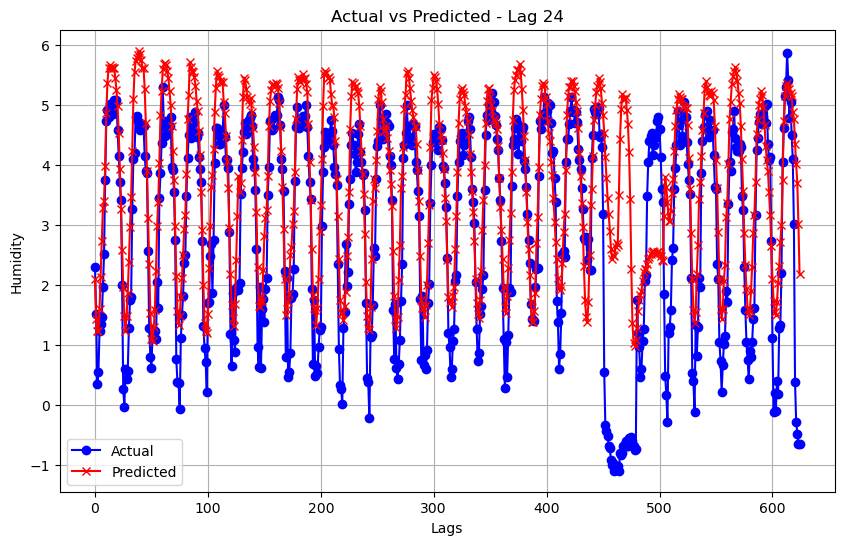

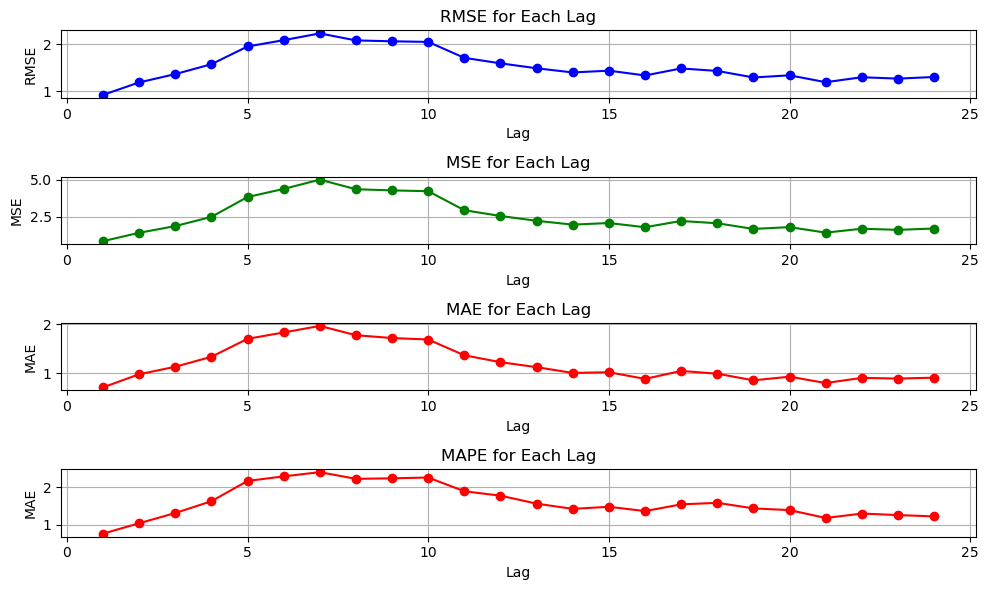

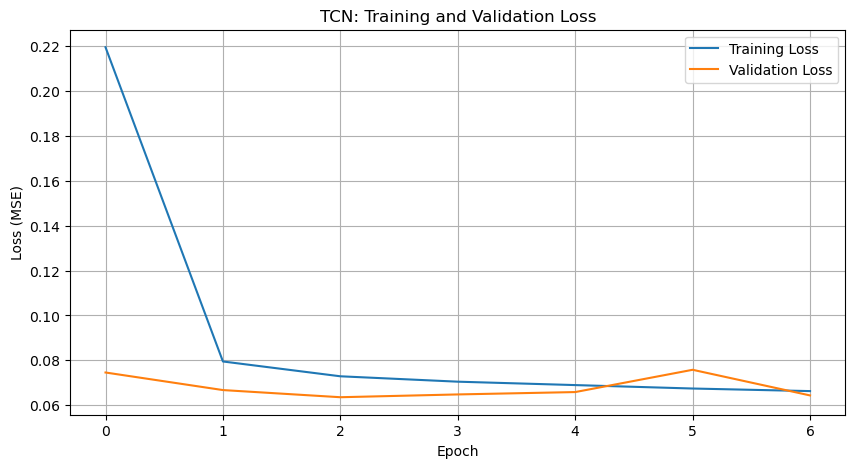

In [170]:
test_size = 720
val_size = int((len(df) - test_size) * 0.1)
train_size = len(df) - test_size - val_size

train_data = df.iloc[:train_size]
val_data = df.iloc[train_size:train_size+val_size]
test_data = df.iloc[-test_size:]

print(f"\nData split: Train {train_data.shape}, Validation {val_data.shape}, Test {test_data.shape}")

scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_data)

val_scaled = scaler.transform(val_data)
test_scaled = scaler.transform(test_data)

seq_length = 72
forecast_horizon = 24

X_train, y_train = create_sequences(train_scaled, seq_length, forecast_horizon)
X_val, y_val = create_sequences(val_scaled, seq_length, forecast_horizon)
X_test, y_test = create_sequences(test_scaled, seq_length, forecast_horizon)

X_train_tensor = torch.FloatTensor(X_train).transpose(1, 2) 
y_train_tensor = torch.FloatTensor(y_train)

X_val_tensor = torch.FloatTensor(X_val).transpose(1, 2)
y_val_tensor = torch.FloatTensor(y_val)

X_test_tensor = torch.FloatTensor(X_test).transpose(1, 2)
y_test_tensor = torch.FloatTensor(y_test)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)


input_channels = 12  
output_channels = 1 
residual_channels = 8
skip_channels = 8
kernel_size = 2
num_blocks = 2
num_layers_per_block = 3  

tcn_model = TCN(
    input_channels=input_channels,
    output_channels=output_channels,
    residual_channels=residual_channels,
    skip_channels=skip_channels,
    kernel_size=kernel_size,
    num_blocks=num_blocks,
    num_layers_per_block=num_layers_per_block,
    forecast_horizon=forecast_horizon
)

learning_rate = 0.001
num_epochs = 10
early_stopping_patience = 4

criterion = nn.MSELoss()
optimizer = optim.AdamW(tcn_model.parameters(), lr=learning_rate, weight_decay=1e-5)

from torchviz import make_dot
print("\nTraining TCN model...")
train_losses, val_losses = train_tcn_model(
    tcn_model, 
    train_loader, 
    val_loader, 
    criterion, 
    optimizer, 
    num_epochs,
    early_stopping_patience
)

dummy_input = torch.zeros(32, 12, 12)  
 
tcn_model.eval()
test_loss = 0.0
test_preds = []
test_targets = []

with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = tcn_model(inputs)
        outputs = outputs.squeeze(1)
        loss = criterion(outputs, targets)
        test_loss += loss.item()
        
        test_preds.append(outputs.cpu().numpy())
        test_targets.append(targets.cpu().numpy())
output = tcn_model(dummy_input)
make_dot(output, params=dict(tcn_model.named_parameters())).render("tcn_model_computation_graph", format="png")

test_loss /= len(test_loader)
print(f'TCN Test Loss: {test_loss:.4f}')


test_preds = np.vstack(test_preds)
test_targets = np.vstack(test_targets)

rmse_list = []
mse_list = []
mae_list = []
mape_list = []

for i in range(forecast_horizon):
    
    humidity_init = test_targets[:, i].reshape(-1, 1)
    replicated_data = np.hstack([humidity_init] * 12) 
    inverse_transformed_data = scaler.inverse_transform(replicated_data)
    transformed_init = inverse_transformed_data[:, 1]  
 
    humidity_pred = test_preds[:, i].reshape(-1, 1)
    replicated_data_2 = np.hstack([humidity_pred] * 12)  
    inverse_transformed_data_2 = scaler.inverse_transform(replicated_data_2)
    transformed_pred = inverse_transformed_data_2[:, 1]  
    
    mse = mean_squared_error(transformed_init, transformed_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(transformed_init, transformed_pred)
    mape = mean_absolute_percentage_error(transformed_init, transformed_pred)
    
    rmse_list.append(rmse)
    mse_list.append(mse)
    mae_list.append(mae)
    mape_list.append(mape)
    
print(f'Lag {forecast_horizon} - RMSE: {rmse:.4f}, MSE: {mse:.4f}, MAE: {mae:.4f}')

plt.figure(figsize=(10, 6))
plt.plot(transformed_init, label="Actual", color='blue', marker='o')
plt.plot(transformed_pred, label="Predicted", color='red', marker='x')
plt.title(f'Actual vs Predicted - Lag {i+1}')
plt.xlabel('Lags')
plt.ylabel('Humidity')
plt.legend()
plt.grid(True)
plt.show()


lags = np.arange(1, forecast_horizon + 1)

plt.figure(figsize=(10, 6))

plt.subplot(4, 1, 1)
plt.plot(lags, rmse_list, label='RMSE', color='blue', marker='o')
plt.title('RMSE for Each Lag')
plt.xlabel('Lag')
plt.ylabel('RMSE')
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(lags, mse_list, label='MSE', color='green', marker='o')
plt.title('MSE for Each Lag')
plt.xlabel('Lag')
plt.ylabel('MSE')
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(lags, mae_list, label='MAE', color='red', marker='o')
plt.title('MAE for Each Lag')
plt.xlabel('Lag')
plt.ylabel('MAE')
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(lags, mape_list, label='MAPE', color='red', marker='o')
plt.title('MAPE for Each Lag')
plt.xlabel('Lag')
plt.ylabel('MAE')
plt.grid(True)

plt.tight_layout()



plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('TCN: Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('tcn_training_losses.png')
plt.close()

In [171]:
df = df = pd.read_csv("ELECTRIC.csv")

In [172]:
df = df.rename(
    columns={
        "Unnamed: 0": "date",
    }
)

df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")

In [174]:
df = df.resample('D').mean()

In [175]:
df

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
date,,,,,,,,,,,,,,,,,,,,,
2011-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-28,2.366223,22.203947,1.574718,149.242039,70.591972,209.604415,4.475221,263.082211,53.321678,49.943996,...,300.157626,34084.375000,2299.182489,2682.054924,85.098870,5.753852,478.279558,45.892460,688.912818,16179.054054
2014-12-29,2.590948,23.048542,1.674269,146.532012,74.987297,237.754216,5.735350,315.481201,69.766171,66.017025,...,300.261718,32386.458333,2154.711674,2803.030303,87.896567,12.019700,561.759219,134.529772,769.611437,18817.567568
2014-12-30,2.419099,22.974455,1.719519,148.860942,74.885671,248.759921,6.112210,321.969697,67.580857,67.596326,...,296.752320,30253.125000,2126.318565,2745.975379,110.576923,9.295153,586.817749,166.631886,770.314027,19453.828829


In [176]:
df = df[["MT_200"]]

In [177]:
df['month'] = df.index.month
df['day_of_year'] = df.index.dayofyear
df['season'] = pd.cut(df['day_of_year'], 
                     bins=[0, 59, 151, 242, 333,366],
                     labels=['Winter', 'Spring', 'Summer', 'Fall','Winter'],ordered=False)

categorical_cols = ['season']
encoder = OneHotEncoder(sparse=False, drop=None)
encoded_array = encoder.fit_transform(df[categorical_cols])
encoded_col_names = encoder.get_feature_names_out(categorical_cols)
encoded_df = pd.DataFrame(encoded_array, columns=encoded_col_names, index=df.index)
df = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)

df['month_sin'] = np.sin(2 * np.pi * df['month']/12)
df['month_cos'] = np.cos(2 * np.pi * df['month']/12)
df['day_of_year_sin'] = np.sin(2 * np.pi * df['day_of_year']/365.25)
df['day_of_year_cos'] = np.cos(2 * np.pi * df['day_of_year']/365.25)
df["rolling_mean_1d_MT_200"] = df["MT_200"].rolling(window=96,min_periods = 1).mean()

/var/folders/4v/k7csrcpx6qb36th08xz06g600000gn/T/ipykernel_14044/916932134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/var/folders/4v/k7csrcpx6qb36th08xz06g600000gn/T/ipykernel_14044/916932134.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_year'] = df.index.dayofyear
/var/folders/4v/k7csrcpx6qb36th08xz06g600000gn/T/ipykernel_14044/916932134.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro


Data split: Train (1289, 12), Validation (143, 12), Test (30, 12)

Training TCN model...
Epoch 1/10, Train Loss: 0.4232, Val Loss: 0.2307
Epoch 2/10, Train Loss: 0.1583, Val Loss: 0.2100
Epoch 3/10, Train Loss: 0.1496, Val Loss: 0.1324
Epoch 4/10, Train Loss: 0.1433, Val Loss: 0.1497
Epoch 5/10, Train Loss: 0.1340, Val Loss: 0.1340
Epoch 6/10, Train Loss: 0.1353, Val Loss: 0.1318
Epoch 7/10, Train Loss: 0.1310, Val Loss: 0.1424
Epoch 8/10, Train Loss: 0.1300, Val Loss: 0.1278
Epoch 9/10, Train Loss: 0.1286, Val Loss: 0.1499
Epoch 10/10, Train Loss: 0.1222, Val Loss: 0.1222
TCN Test Loss: 1.3448
Lag 1 - RMSE: 3.6449, MSE: 13.2854, MAE: 2.5008


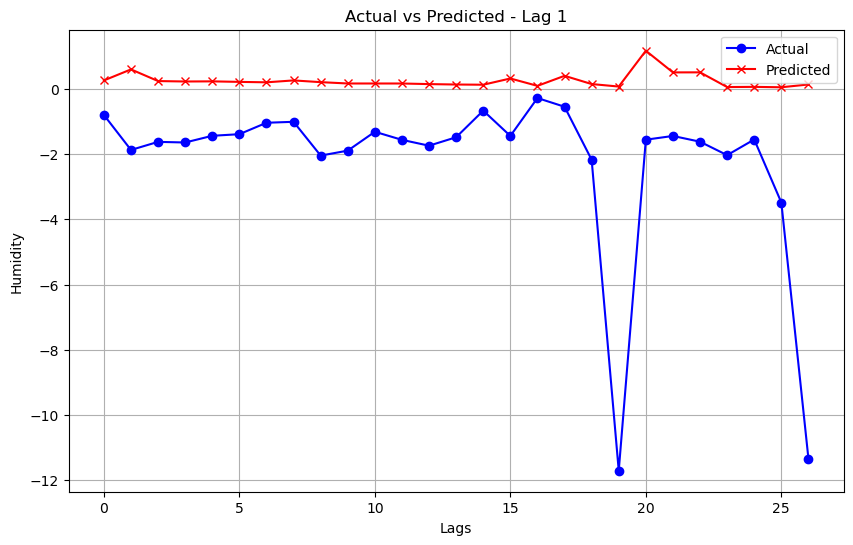

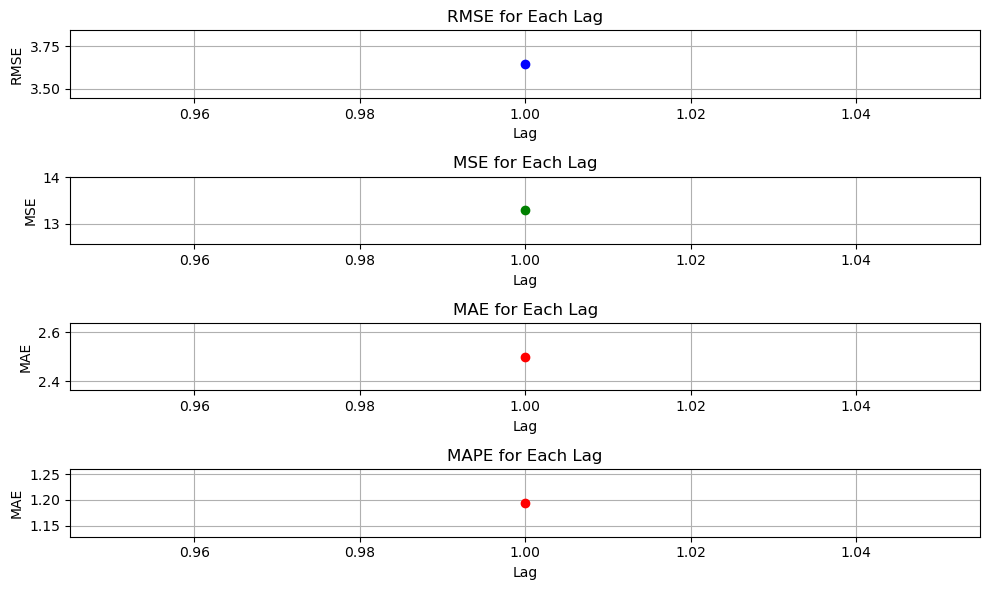

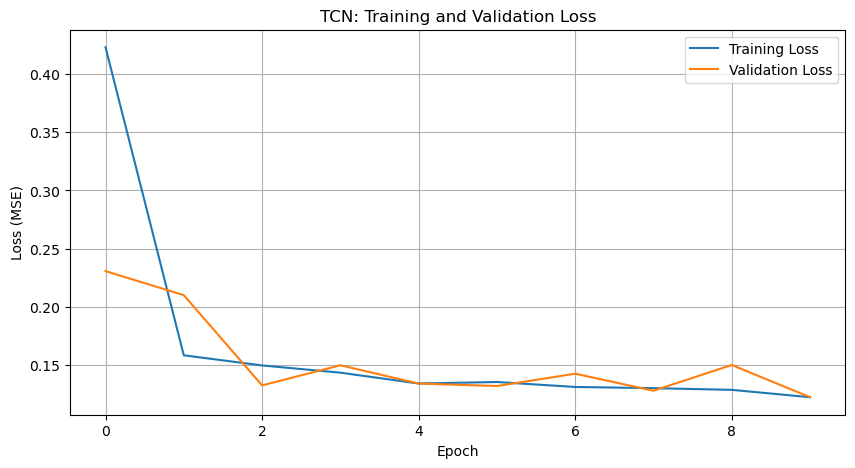

In [181]:
test_size = 30
val_size = int((len(df) - test_size) * 0.1)
train_size = len(df) - test_size - val_size

train_data = df.iloc[:train_size]
val_data = df.iloc[train_size:train_size+val_size]
test_data = df.iloc[-test_size:]

print(f"\nData split: Train {train_data.shape}, Validation {val_data.shape}, Test {test_data.shape}")

scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_data)

val_scaled = scaler.transform(val_data)
test_scaled = scaler.transform(test_data)

seq_length = 3
forecast_horizon = 1

X_train, y_train = create_sequences(train_scaled, seq_length, forecast_horizon)
X_val, y_val = create_sequences(val_scaled, seq_length, forecast_horizon)
X_test, y_test = create_sequences(test_scaled, seq_length, forecast_horizon)

X_train_tensor = torch.FloatTensor(X_train).transpose(1, 2) 
y_train_tensor = torch.FloatTensor(y_train)

X_val_tensor = torch.FloatTensor(X_val).transpose(1, 2)
y_val_tensor = torch.FloatTensor(y_val)

X_test_tensor = torch.FloatTensor(X_test).transpose(1, 2)
y_test_tensor = torch.FloatTensor(y_test)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)


input_channels = 12  
output_channels = 1 
residual_channels = 8
skip_channels = 8
kernel_size = 4
num_blocks = 4
num_layers_per_block = 6

tcn_model = TCN(
    input_channels=input_channels,
    output_channels=output_channels,
    residual_channels=residual_channels,
    skip_channels=skip_channels,
    kernel_size=kernel_size,
    num_blocks=num_blocks,
    num_layers_per_block=num_layers_per_block,
    forecast_horizon=forecast_horizon
)

learning_rate = 0.001
num_epochs = 10
early_stopping_patience = 4

criterion = nn.MSELoss()
optimizer = optim.AdamW(tcn_model.parameters(), lr=learning_rate, weight_decay=1e-5)

from torchviz import make_dot
print("\nTraining TCN model...")
train_losses, val_losses = train_tcn_model(
    tcn_model, 
    train_loader, 
    val_loader, 
    criterion, 
    optimizer, 
    num_epochs,
    early_stopping_patience
)

dummy_input = torch.zeros(32, 12, 12)  
 
tcn_model.eval()
test_loss = 0.0
test_preds = []
test_targets = []

with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = tcn_model(inputs)
        outputs = outputs.squeeze(1)
        loss = criterion(outputs, targets)
        test_loss += loss.item()
        
        test_preds.append(outputs.cpu().numpy())
        test_targets.append(targets.cpu().numpy())
output = tcn_model(dummy_input)
make_dot(output, params=dict(tcn_model.named_parameters())).render("tcn_model_computation_graph", format="png")

test_loss /= len(test_loader)
print(f'TCN Test Loss: {test_loss:.4f}')


test_preds = np.vstack(test_preds)
test_targets = np.vstack(test_targets)

rmse_list = []
mse_list = []
mae_list = []
mape_list = []

for i in range(forecast_horizon):
    
    humidity_init = test_targets[:, i].reshape(-1, 1)
    replicated_data = np.hstack([humidity_init] * 12) 
    inverse_transformed_data = scaler.inverse_transform(replicated_data)
    transformed_init = inverse_transformed_data[:, 1]  
 
    humidity_pred = test_preds[:, i].reshape(-1, 1)
    replicated_data_2 = np.hstack([humidity_pred] * 12)  
    inverse_transformed_data_2 = scaler.inverse_transform(replicated_data_2)
    transformed_pred = inverse_transformed_data_2[:, 1]  
    
    mse = mean_squared_error(transformed_init, transformed_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(transformed_init, transformed_pred)
    mape = mean_absolute_percentage_error(transformed_init, transformed_pred)
    
    rmse_list.append(rmse)
    mse_list.append(mse)
    mae_list.append(mae)
    mape_list.append(mape)
    
print(f'Lag {forecast_horizon} - RMSE: {rmse:.4f}, MSE: {mse:.4f}, MAE: {mae:.4f}')

plt.figure(figsize=(10, 6))
plt.plot(transformed_init, label="Actual", color='blue', marker='o')
plt.plot(transformed_pred, label="Predicted", color='red', marker='x')
plt.title(f'Actual vs Predicted - Lag {i+1}')
plt.xlabel('Lags')
plt.ylabel('Humidity')
plt.legend()
plt.grid(True)
plt.show()


lags = np.arange(1, forecast_horizon + 1)

plt.figure(figsize=(10, 6))

plt.subplot(4, 1, 1)
plt.plot(lags, rmse_list, label='RMSE', color='blue', marker='o')
plt.title('RMSE for Each Lag')
plt.xlabel('Lag')
plt.ylabel('RMSE')
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(lags, mse_list, label='MSE', color='green', marker='o')
plt.title('MSE for Each Lag')
plt.xlabel('Lag')
plt.ylabel('MSE')
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(lags, mae_list, label='MAE', color='red', marker='o')
plt.title('MAE for Each Lag')
plt.xlabel('Lag')
plt.ylabel('MAE')
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(lags, mape_list, label='MAPE', color='red', marker='o')
plt.title('MAPE for Each Lag')
plt.xlabel('Lag')
plt.ylabel('MAE')
plt.grid(True)

plt.tight_layout()



plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('TCN: Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('tcn_training_losses.png')
plt.close()